<a href="https://colab.research.google.com/github/FarrellMinette/Hackathon/blob/main/Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# @title Setup
from google.colab import auth
from google.cloud import bigquery
from google.colab import data_table

project_id = "hackathon-1123-395609"
data = "hackhathon_data"
tables = "hackathon_tables"
table = "drivers"

project = project_id
# location = '|location|' # Location inserted based on the query results selected to explore
client = bigquery.Client(project=project)
data_table.enable_dataframe_formatter()
auth.authenticate_user()

In [100]:
# @title Import data
from sklearn.cluster import KMeans
from pandas.plotting import parallel_coordinates
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd
import os
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from google.cloud import bigquery
import warnings

# Suppress deprecation warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

client = bigquery.Client(project=project_id)

# Construct the table reference
table_ref = "hackathon-1123-395609.hackathon_flow_dataset.Drivers"

# Fetch the data from the table
query = f"SELECT * FROM {table_ref}"
df = client.query(query).to_dataframe()
df = df[1:]
# Normalize the data using Min-Max scaling
scaler = MinMaxScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Standardize the normalized data using StandardScaler
scaler_standard = StandardScaler()
df_stand_norm = pd.DataFrame(scaler_standard.fit_transform(df_normalized), columns=df_normalized.columns)
columns_to_include = ['TotalClaimsCost','NumClaims','DangerousTimesRatio','DangerousAreasRatio','SpeedPenalty','BrakingPenalty','AccPenalty','NetAccPenalty']

data = df_stand_norm[columns_to_include]

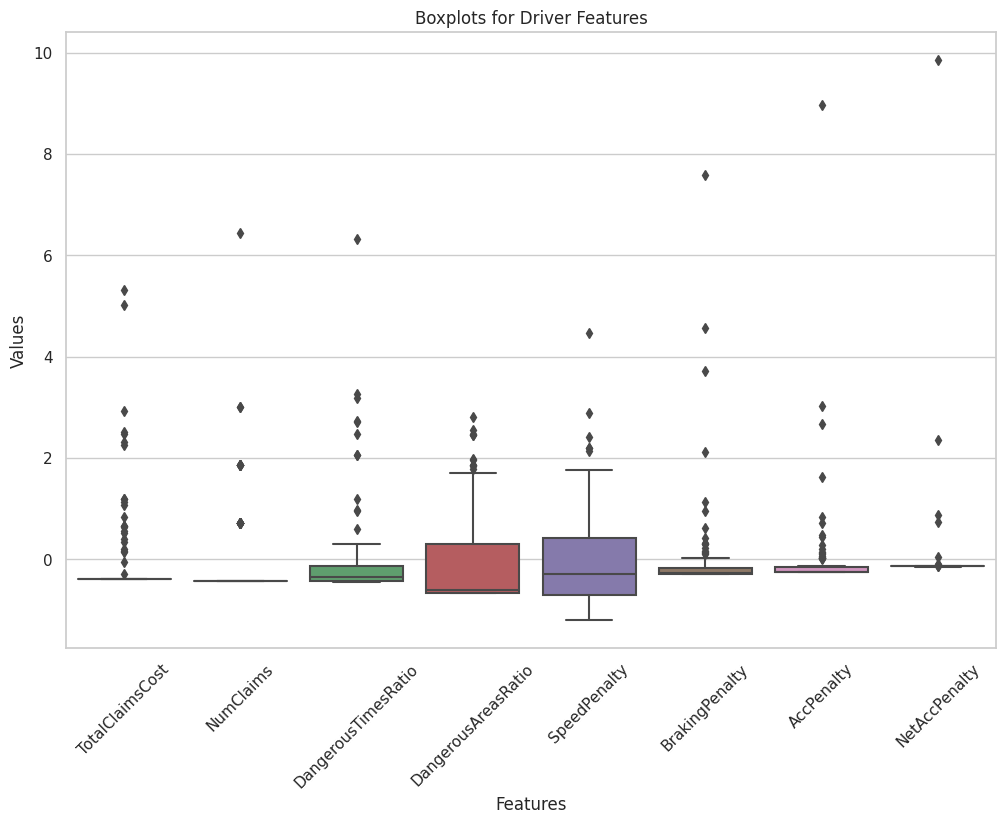

In [101]:
# @title Show combined boxplots before and after standardised
import seaborn as sns

# Create a combined boxplot for all variables and save it as an image
plt.figure(figsize=(12, 8))  # Adjust figure size if needed
sns.boxplot(data=data)

# Set a title and labels
plt.title("Boxplots for Driver Features")
plt.xlabel("Features")
plt.ylabel("Values")

# Rotate x-axis labels if needed
plt.xticks(rotation=45)
plt.show()

In [105]:
import numpy as np
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

# Generate some example data (replace with your own data)
num_samples = 106
num_features = 9

# Define the architecture of the autoencoder
input_layer = Input(shape=(num_features,))
encoding_dim = 3  # Number of neurons in the encoding layer
encoded = Dense(encoding_dim, activation='relu')(input_layer)
decoded = Dense(num_features, activation='sigmoid')(encoded)

# Create the autoencoder model
autoencoder = Model(inputs=input_layer, outputs=decoded)
data.loc[:,'DangerousAreasRatio'] = data['DangerousAreasRatio'] * 0.8

# Compile the model
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Train the autoencoder
autoencoder.fit(data, data, epochs=50, batch_size=32, shuffle=True)

# Use the trained autoencoder to encode and decode data
encoded_data = autoencoder.predict(data)

Epoch 1/50


<ipython-input-105-5354078f896b>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:,'DangerousAreasRatio'] = data['DangerousAreasRatio'] * 0.8


4/4 [==============================] - 0s 3ms/step - loss: 1.0111
Epoch 2/50
4/4 [==============================] - 0s 2ms/step - loss: 1.0081
Epoch 3/50
4/4 [==============================] - 0s 3ms/step - loss: 1.0052
Epoch 4/50
4/4 [==============================] - 0s 2ms/step - loss: 1.0022
Epoch 5/50
4/4 [==============================] - 0s 2ms/step - loss: 0.9992
Epoch 6/50
4/4 [==============================] - 0s 2ms/step - loss: 0.9964
Epoch 7/50
4/4 [==============================] - 0s 2ms/step - loss: 0.9935
Epoch 8/50
4/4 [==============================] - 0s 2ms/step - loss: 0.9906
Epoch 9/50
4/4 [==============================] - 0s 2ms/step - loss: 0.9876
Epoch 10/50
4/4 [==============================] - 0s 3ms/step - loss: 0.9849
Epoch 11/50
4/4 [==============================] - 0s 2ms/step - loss: 0.9819
Epoch 12/50
4/4 [==============================] - 0s 2ms/step - loss: 0.9790
Epoch 13/50
4/4 [==============================] - 0s 2ms/step - loss: 0.9761
Epoch 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-106-ae728580fad8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["cluster"] = kmeans.fit_predict(encoded_data)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


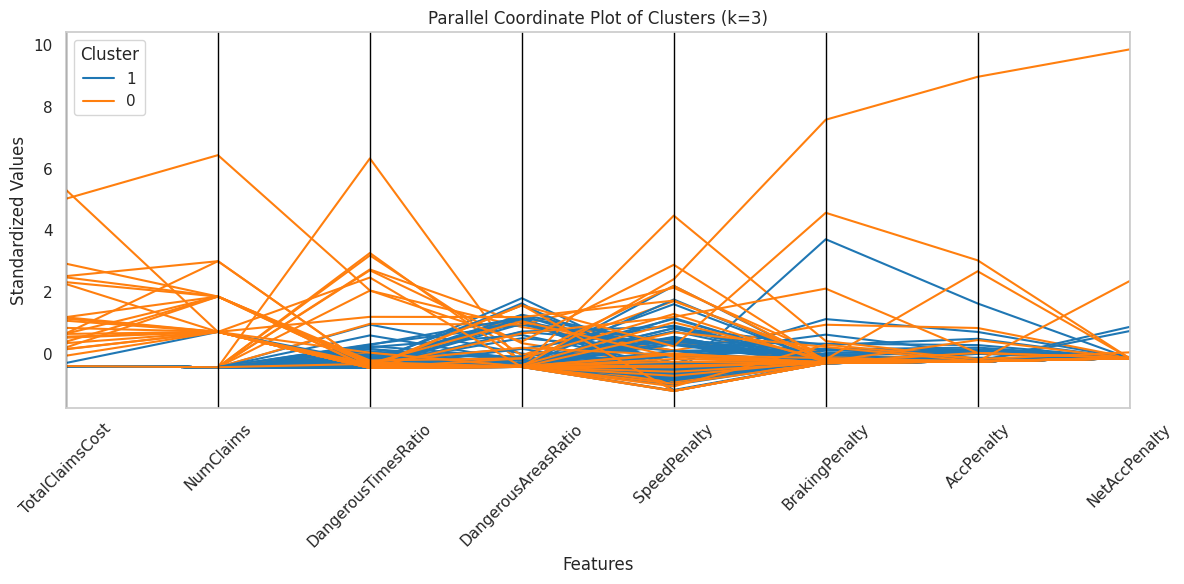

In [106]:
from sklearn.cluster import KMeans

# Assuming 'encoded_data' is the encoded representations from the autoencoder
num_clusters = 2  # Number of clusters you want to find
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
# Fit the KMeans model to the encoded data
data["cluster"] = kmeans.fit_predict(encoded_data)
df["cluster"] = kmeans.fit_predict(encoded_data)
# print(cluster_assignments)

# Set up the figure and create the parallel coordinate plot
plt.figure(figsize=(12, 6))
parallel_coordinates(
    data,
    "cluster",
    color=("#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b"),
)

# Add legend and adjust layout
plt.legend(title="Cluster")
plt.title(f"Parallel Coordinate Plot of Clusters (k={k})")
plt.xlabel("Features")
plt.ylabel("Standardized Values")
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

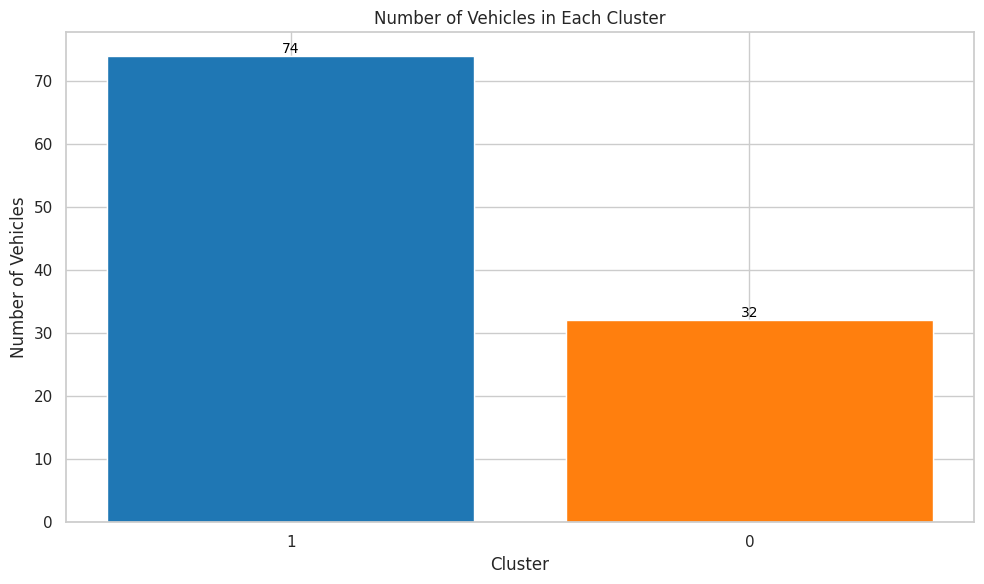

     VehicleID  cluster ClusterLabel
1    139896699        1         good
2    174578549        1         good
3    139599033        1         good
4    176947147        1         good
5    203444726        0          bad
..         ...      ...          ...
102   96215479        0          bad
103  104804470        0          bad
104  111082600        0          bad
105   87055861        0          bad
106   92624443        0          bad

[106 rows x 3 columns]


<ipython-input-111-ea15d5b65752>:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['ClusterLabel'] = subset['cluster'].apply(map_cluster_to_label)


In [111]:
# @title Bar chart
import pandas as pd
import random
# Assuming your DataFrame has a "cluster" column
cluster_column = 'cluster'


# Define the number of bins for the histogram
num_bins = 20

# Set up the figure and axes
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Count the number of vehicles in each cluster
vehicle_counts = df[cluster_column].value_counts()

# Generate random colors for the bars
bar_colors = ["#1f77b4", "#ff7f0e"]

# Create a histogram of vehicle counts per cluster
plt.bar([0, 1], vehicle_counts.values, color=bar_colors)
bars = plt.bar([0, 1], vehicle_counts.values, color=bar_colors)
plt.xticks([0, 1], vehicle_counts.index)
plt.xlabel("Cluster")
plt.ylabel("Number of Vehicles")
plt.title("Number of Vehicles in Each Cluster")
plt.tight_layout()

for bar, count in zip(bars, vehicle_counts.values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(count),
             va="bottom", ha="center", fontsize=10, color="black")

# Show the histogram
plt.show()

# Assuming df_stand_norm is your DataFrame
selected_columns = ['VehicleID', 'cluster']
subset = df[selected_columns]

# Define a function to map cluster values to labels
def map_cluster_to_label(cluster_value):
    if cluster_value == 1:
        return "good"
    elif cluster_value == 0:
        return "bad"
    else:
        return "unknown"

# Apply the mapping function to the 'cluster' column and create a new 'ClusterLabel' column
subset['ClusterLabel'] = subset['cluster'].apply(map_cluster_to_label)

print(subset)
